In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

import theano
theano.config.optimizer = 'fast_run'

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np
import matplotlib.pyplot as plt
print(gp.__version__)

2.0.1


In [2]:
geo_model = gp.create_model('Greenstone')

In [3]:
# Importing the data from csv files and settign extent and resolution
geo_model = gp.init_data(geo_model, [696000,747000,6863000,6930000,-20000, 200],[50, 50, 50],
                         path_o = os.pardir+"/data/input_data/tut_SandStone/SandStone_Foliations.csv",
                         path_i = os.pardir+"/data/input_data/tut_SandStone/SandStone_Points.csv")

Active grids: ['regular']


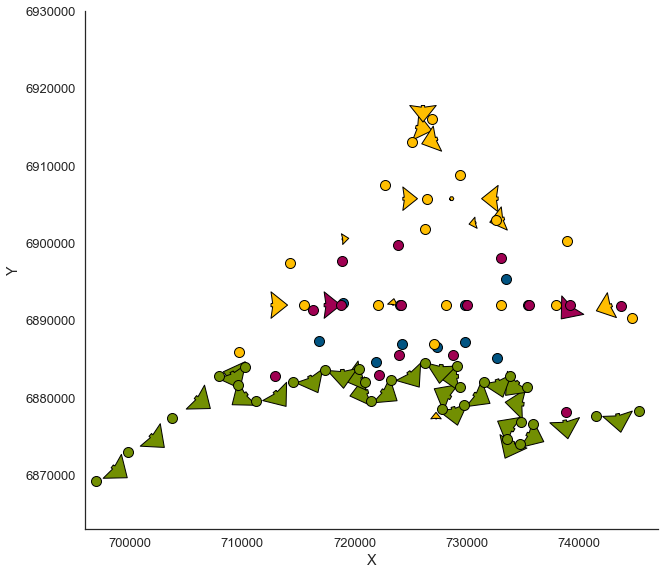

In [4]:
gp.plot.plot_data(geo_model, direction='z')

In [5]:
gp.map_series_to_surfaces(geo_model, {"EarlyGranite_Series": 'EarlyGranite', 
                         "BIF_Series":('SimpleMafic2', 'SimpleBIF'),
                          "SimpleMafic_Series":'SimpleMafic1', 'Basement':'basement'})

,surface,series,order_surfaces,isBasement,color,id
3,EarlyGranite,EarlyGranite_Series,1,False,#728f02,1
0,SimpleMafic2,BIF_Series,1,False,#015482,2
1,SimpleBIF,BIF_Series,2,False,#9f0052,3
2,SimpleMafic1,SimpleMafic_Series,1,False,#ffbe00,4
4,basement,Basement,1,True,#443988,5


In [6]:
geo_model.add_surface_values([2.61,2.92,3.1,2.92,2.61])

,surface,series,order_surfaces,isBasement,color,id,value_0
3,EarlyGranite,EarlyGranite_Series,1,False,#728f02,1,2.61
0,SimpleMafic2,BIF_Series,1,False,#015482,2,2.92
1,SimpleBIF,BIF_Series,2,False,#9f0052,3,3.1
2,SimpleMafic1,SimpleMafic_Series,1,False,#ffbe00,4,2.92
4,basement,Basement,1,True,#443988,5,2.61


In [7]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [8]:
gp.compute_model(geo_model, set_solutions=True)


Lithology ids 
  [5. 5. 5. ... 5. 5. 5.] 

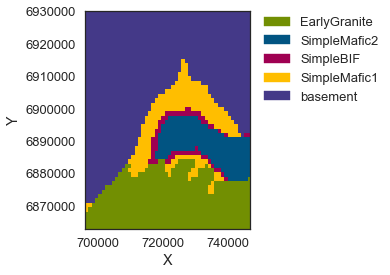

In [9]:
gp.plot.plot_section(geo_model, -1, direction='z', show_data=False)

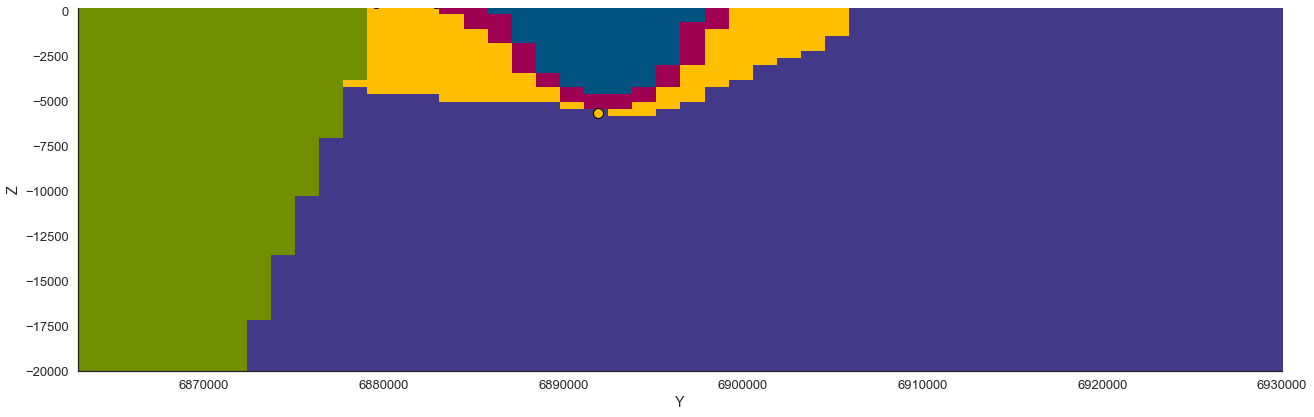

In [22]:
gp.plot.plot_section(geo_model, 25, direction='x')

In [10]:
geo_model.solutions.values_matrix

array([[2.6099999, 2.6099999, 2.6099999, ..., 2.6099999, 2.6099999,
        2.6099999]])

In [16]:
geo_model.rescaling.df['centers']

values    [721180.0625, 6893494.75, -3951.360221]
Name: centers, dtype: object

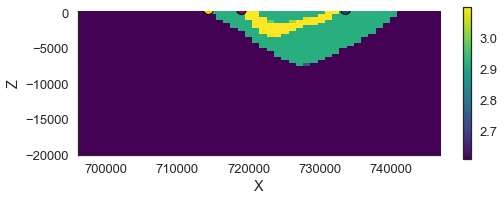

In [12]:
gp.plot.plot_section(geo_model, 25, block = geo_model.solutions.values_matrix,  direction='y', show_data=True,
                    cmap='viridis', norm=None)

plt.colorbar()

In [13]:
np.save('greenstone_ver', geo_model.solutions.vertices)
np.save('greenstone_edges', geo_model.solutions.edges)

### Saving the model

In [12]:
gp.save_model(geo_model, path=os.pardir+'/data/gempy_models')

Directory already exists, files will be overwritten


True

In [13]:
geo_model.meta.project_name

'Greenstone'